In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten,Deconvolution2D,BatchNormalization,Add,Input,Concatenate,Add,Conv2DTranspose,concatenate
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import cv2
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
from keras.models import Model

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['camseq01']


In [2]:
imgdir=glob.glob("../input/camseq01/*.png")

In [3]:
len(imgdir)

202

In [4]:
imgdir[:5]

['../input/camseq01/0016E5_08095_L.png',
 '../input/camseq01/0016E5_08069.png',
 '../input/camseq01/0016E5_08095.png',
 '../input/camseq01/0016E5_07995_L.png',
 '../input/camseq01/0016E5_08059_L.png']

In [5]:
xtrain=[]
ytrain=[]
for i in imgdir:
    if "_L" in i:
        img=cv2.imread(i)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(256,256))
        ytrain.append(img)
    else:
        img=cv2.imread(i)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(256,256))
        xtrain.append(img)

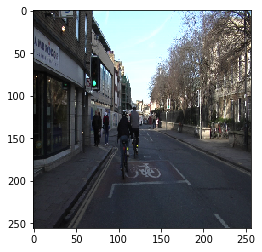

In [6]:
plt.imshow(xtrain[0])

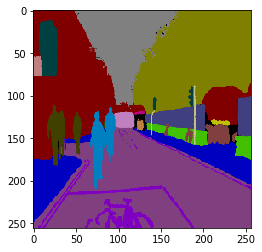

In [7]:
plt.imshow(ytrain[0])

In [8]:
ytrain[0].shape

(256, 256, 3)

In [9]:
xtrain=np.array(xtrain).astype(np.float32)/255
ytrain=np.array(ytrain).astype(np.float32)/255

In [10]:
xtrain[0]

array([[[0.13333334, 0.13333334, 0.13333334],
        [0.10980392, 0.10588235, 0.10588235],
        [0.15294118, 0.14901961, 0.14901961],
        ...,
        [0.58431375, 0.6901961 , 0.73333335],
        [0.5882353 , 0.70980394, 0.91764706],
        [0.81960785, 0.9882353 , 1.        ]],

       [[0.14509805, 0.14509805, 0.13725491],
        [0.11764706, 0.11372549, 0.10588235],
        [0.1254902 , 0.12156863, 0.11764706],
        ...,
        [0.60784316, 0.7019608 , 0.7254902 ],
        [0.5529412 , 0.7019608 , 0.8980392 ],
        [0.49019608, 0.64705884, 0.8509804 ]],

       [[0.15294118, 0.15294118, 0.14509805],
        [0.15686275, 0.15294118, 0.14117648],
        [0.14901961, 0.14509805, 0.13333334],
        ...,
        [0.21176471, 0.3019608 , 0.28235295],
        [0.39607844, 0.5882353 , 0.6039216 ],
        [0.52156866, 0.6862745 , 0.79607844]],

       ...,

       [[0.14509805, 0.14901961, 0.16470589],
        [0.14509805, 0.14901961, 0.16470589],
        [0.14509805, 0

In [11]:
inp=Input((256,256,3))
x1=Conv2D(16,3,padding='same',activation='elu',kernel_initializer='he_normal')(inp)
x1=BatchNormalization()(x1)
x1=Dropout(0.2)(x1)
x1=Conv2D(16,3,padding='same',activation='elu',kernel_initializer='he_normal')(x1)

x1=BatchNormalization()(x1)
x1=Dropout(0.2)(x1)
p1=MaxPooling2D()(x1)

inp2=Conv2D(32,3,padding='same',activation='elu',kernel_initializer='he_normal')(p1)
x2=BatchNormalization()(inp2)
x2=Dropout(0.2)(x2)
x2=Conv2D(32,3,padding='same',activation='elu',kernel_initializer='he_normal')(x2)
x2=Add()([inp2,x2])
x2=BatchNormalization()(x2)
x2=Dropout(0.2)(x2)
p2=MaxPooling2D()(x2)

inp3=Conv2D(32,3,padding='same',activation='elu',kernel_initializer='he_normal')(p2)
x3=BatchNormalization()(inp3)
x3=Dropout(0.2)(x3)
x3=Conv2D(32,3,padding='same',activation='elu',kernel_initializer='he_normal')(x3)
x3=Add()([inp3,x3])
x3=BatchNormalization()(x3)
x3=Dropout(0.2)(x3)
p3=MaxPooling2D()(x3)

inp4=Conv2D(32,3,padding='same',activation='elu',kernel_initializer='he_normal')(p3)
x4=BatchNormalization()(inp4)
x4=Dropout(0.2)(x4)
x4=Conv2D(32,3,padding='same',activation='elu',kernel_initializer='he_normal')(x4)
x4=Add()([inp4,x4])
x4=BatchNormalization()(x4)
x4=Dropout(0.2)(x4)
p4=MaxPooling2D()(x4)

 
x5=Conv2D(256,3,padding='same',activation='elu',kernel_initializer='he_normal')(p4)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (x5)
u61 = concatenate([u6, x4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u61)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)
c6 = Add()([u6,c6])

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u71 = concatenate([u7, x3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u71)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)
c7 = Add()([u7,c7])

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u81 = concatenate([u8, x2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u81)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)
c7 = Add()([u8,c8])

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u91 = concatenate([u9, x1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u91)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)
c7 = Add()([u9,c9])
outputs = Conv2D(3, (1, 1), activation='sigmoid') (c9)

In [12]:
model=Model(inp,outputs)

In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 256, 256, 16) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [15]:
results = model.fit(xtrain,ytrain, validation_split=0.05, batch_size=16, epochs=300)

Train on 95 samples, validate on 6 samples
Epoch 1/300
95/95 [==============================] - 6s 66ms/step - loss: 0.7873 - val_loss: 0.6504
Epoch 2/300
95/95 [==============================] - 1s 8ms/step - loss: 0.6540 - val_loss: 0.6075
Epoch 3/300
95/95 [==============================] - 1s 8ms/step - loss: 0.6204 - val_loss: 0.6019
Epoch 4/300
95/95 [==============================] - 1s 8ms/step - loss: 0.6032 - val_loss: 0.5846
Epoch 5/300
95/95 [==============================] - 1s 8ms/step - loss: 0.5906 - val_loss: 0.5824
Epoch 6/300
95/95 [==============================] - 1s 8ms/step - loss: 0.5822 - val_loss: 0.5988
Epoch 7/300
95/95 [==============================] - 1s 8ms/step - loss: 0.5758 - val_loss: 0.5839
Epoch 8/300
95/95 [==============================] - 1s 8ms/step - loss: 0.5732 - val_loss: 0.5768
Epoch 9/300
95/95 [==============================] - 1s 8ms/step - loss: 0.5720 - val_loss: 0.5670
Epoch 10/300
95/95 [==============================] - 1s 8ms/step

In [16]:
pred=model.predict(xtrain)

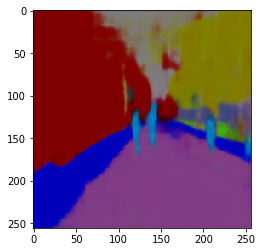

In [17]:
plt.imshow(pred[1])

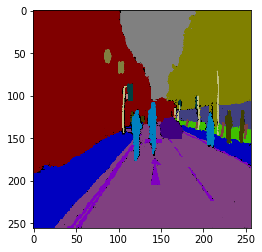

In [18]:
plt.imshow(ytrain[1])

In [19]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(pred[1], -1, kernel)